<a href="https://colab.research.google.com/github/JANG-hyeonjun/biomedical_deeplearning/blob/main/lab02_201602955_%EC%9E%A5%ED%98%84%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.2linear-regression-scratch

## 3.2.1generating the Dataset

In [363]:
!pip install -U mxnet-cu101==1.7.0
!pip install d2l==0.16.2

Requirement already up-to-date: mxnet-cu101==1.7.0 in /usr/local/lib/python3.7/dist-packages (1.7.0)


In [364]:
%matplotlib inline 
import random
import torch
from d2l import torch as d2l

In [365]:
def synthetic_data(w,b,num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    print(w.shape)
    print(X.shape)
    y = torch.matmul(X,w) + b
    print(len(y))
    y += torch.normal(0,0.01,y.shape)
    print('\n')
    print(len(y))
    return X,y.reshape((-1,1))


In [366]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

torch.Size([2])
torch.Size([1000, 2])
1000


1000


In [367]:
print(features.shape)
print(labels.shape)
print(len(features))

torch.Size([1000, 2])
torch.Size([1000, 1])
1000


In [368]:
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([0.5418, 0.8111]) 
label: tensor([2.5197])


In [369]:
print(features[:,(1)])

tensor([ 8.1115e-01, -3.0234e-01,  1.0786e-01, -4.3357e-01,  4.8784e-01,
        -3.5050e-01, -3.0368e-02,  9.0159e-01,  1.3380e+00,  3.9203e-02,
         1.3829e+00,  3.1461e-01,  8.2112e-02,  1.0023e+00, -1.2854e+00,
         6.3037e-01, -5.3785e-01, -1.2015e+00, -1.3401e+00,  4.0594e-01,
         1.8787e+00, -2.9226e+00,  7.6715e-01,  9.3067e-01,  2.1871e+00,
        -2.3192e+00,  1.4671e-01,  6.5066e-01, -2.6628e-01, -5.1058e-01,
         5.1104e-01, -9.5230e-03, -3.2770e-01, -1.6547e+00, -2.4428e+00,
         1.8382e-01,  1.7515e-01,  9.6158e-01,  3.5698e-01,  1.7644e-01,
         1.7028e-01, -6.9785e-01, -4.2381e-01,  2.8966e-01, -1.5717e+00,
         1.0033e+00,  1.4601e+00,  3.3331e-01, -6.2997e-01,  1.3988e-01,
         1.1876e+00, -6.0337e-02, -5.9455e-02, -4.0477e-01,  4.8002e-02,
        -8.5845e-01, -3.8774e-01, -3.0272e-01,  1.4631e-01, -1.0043e-01,
         5.5284e-01, -4.3527e-01,  1.9432e+00, -9.5844e-01, -7.6128e-01,
         1.9129e-01, -1.1222e+00, -7.5221e-01, -4.9

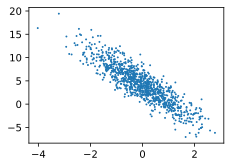

In [370]:
d2l.set_figsize()

d2l.plt.scatter(features[:,(1)].detach().numpy(),
                labels.detach().numpy(),1);

## 3.2 Reading the Dataset

In [371]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    #print(indices)
    random.shuffle(indices)
    #print(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size,num_examples)])
        #print(len(batch_indices))
        yield features[batch_indices],labels[batch_indices]

In [372]:
batch_size = 10

for X,y in data_iter(batch_size, features,labels):
    print(X,'\n',y)
    break

tensor([[ 0.9318,  2.2347],
        [ 1.5182,  0.4606],
        [-0.5223, -1.1713],
        [ 0.0450, -1.0259],
        [ 1.7221, -1.0763],
        [ 0.9406,  0.6825],
        [-0.1595,  0.2906],
        [-0.0541, -0.2181],
        [ 1.0756,  0.6668],
        [-1.0967,  2.1730]]) 
 tensor([[-1.5372],
        [ 5.6777],
        [ 7.1491],
        [ 7.7790],
        [11.2990],
        [ 3.7561],
        [ 2.8860],
        [ 4.8371],
        [ 4.0690],
        [-5.3811]])


## 3.2.3 initializing Model Parameters

In [373]:
w = torch.normal(0,0.01,size=(2,1), requires_grad = True)
b = torch.zeros(1,requires_grad=True)

In [374]:
print(w,b)

tensor([[ 0.0076],
        [-0.0023]], requires_grad=True) tensor([0.], requires_grad=True)


## 3.2.4 Defining the Model

In [375]:
print(X.shape)
print(w.shape)
print(y.shape)

torch.Size([10, 2])
torch.Size([2, 1])
torch.Size([10, 1])


In [376]:
def lineareg(X,w,b):
    return torch.matmul(X,w) + b

## 3.2.5 Defining the Loss Function

In [377]:
def squared_loss(y_hat,y):
    #print(y_hat.shape)
    #print(y.shape)
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## 3.2.6 Defining the Optimization Algorithm

In [378]:
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            #print('!')
            #print(param)
            param -= lr * param.grad / batch_size
            #print(param)
            param.grad.zero_() #trainer.zero_grad
            print(param)

## 3.2.7 Training

In [379]:
lr = 0.03
num_epochs = 3
net = lineareg
loss = squared_loss

In [380]:
print(features.shape)

torch.Size([1000, 2])


In [381]:
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward() #. loss.backward() 편미분이 여기서 완료
        #print(w.grad) 
        #print(b.grad) #그럼 기울기를 구할 수 있다. w,b에 대해 
        sgd([w,b],lr,batch_size) # .step 구해진 w,b를 이용해 구해진 기울기 바탕으로 여기서 w,b를 업데이트 한다. 
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch + 1},loss{float(train_l.mean()):f}') 


tensor([[-0.0136],
        [-0.0986]], requires_grad=True)
tensor([0.1273], requires_grad=True)
tensor([[ 0.0420],
        [-0.1598]], requires_grad=True)
tensor([0.2364], requires_grad=True)
tensor([[ 0.0343],
        [-0.1872]], requires_grad=True)
tensor([0.3292], requires_grad=True)
tensor([[ 0.0634],
        [-0.2174]], requires_grad=True)
tensor([0.4111], requires_grad=True)
tensor([[ 0.1064],
        [-0.2626]], requires_grad=True)
tensor([0.5367], requires_grad=True)
tensor([[ 0.1221],
        [-0.5594]], requires_grad=True)
tensor([0.7002], requires_grad=True)
tensor([[ 0.0880],
        [-0.6227]], requires_grad=True)
tensor([0.7915], requires_grad=True)
tensor([[ 0.0525],
        [-0.9034]], requires_grad=True)
tensor([0.9460], requires_grad=True)
tensor([[ 0.0392],
        [-0.9767]], requires_grad=True)
tensor([1.0222], requires_grad=True)
tensor([[ 0.1884],
        [-1.0737]], requires_grad=True)
tensor([1.1424], requires_grad=True)
tensor([[ 0.1759],
        [-1.1236]], r

In [382]:
print(true_w,true_b)

tensor([ 2.0000, -3.4000]) 4.2


In [383]:
print(f'error in estimating w: {true_w-w.reshape(true_w.shape)}')
print(f'error in estimating b:{true_b - b}')

error in estimating w: tensor([0.0007, 0.0003], grad_fn=<SubBackward0>)
error in estimating b:tensor([0.0006], grad_fn=<RsubBackward1>)


# 3.3Concise Implementation of Linear Regression

## 3.3.1 Generating the Dataset

In [384]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = d2l.synthetic_data(true_w,true_b,1000)

## 3.3.2 Reading the Dataset

In [385]:
def load_array(data_arrays,batch_size,is_train = True): #@save
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

batch_size = 10
data_iter = load_array((features,labels),batch_size)

In [386]:
next(iter(data_iter))

[tensor([[-1.2118,  1.5851],
         [-0.0301,  0.1724],
         [-0.2714, -0.2437],
         [ 0.4880, -0.6067],
         [-0.6051, -0.9909],
         [-1.4713, -0.2261],
         [ 0.3876, -1.0503],
         [-0.0277, -1.9536],
         [-0.1065, -1.2941],
         [ 0.8131,  0.3177]]), tensor([[-3.6063],
         [ 3.5545],
         [ 4.4886],
         [ 7.2476],
         [ 6.3559],
         [ 2.0300],
         [ 8.5408],
         [10.7743],
         [ 8.3920],
         [ 4.7636]])]

##3.3.3 Defining the Model

In [387]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [388]:
print(net[0].weight.data)
print(net[0].bias.data)

tensor([[ 0.3715, -0.1580]])
tensor([-0.6528])


## 3.3.4 Initializing Model Parameters

In [389]:
print(net[0].weight.data.normal_(0,0.01))
net[0].bias.data.fill_(0)

tensor([[-0.0077, -0.0115]])


tensor([0.])

## 3.3.5 Defining the Loss Function

In [390]:
loss = nn.MSELoss()

## 3.3.6 Defining the Optimization Alogrithm

In [391]:
print(net.parameters)

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)>


In [392]:
trainer = torch.optim.SGD(net.parameters(),lr=0.03)

## 3.3.7  Training

In [393]:
num_epochs = 7
for epoch in range(num_epochs):
    for X,y in data_iter:
        l = loss(net(X),y)
        print(l)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features),labels)
    print(f'epoch{epoch + 1},loss{l:f}')

tensor(29.8980, grad_fn=<MseLossBackward>)
tensor(22.1469, grad_fn=<MseLossBackward>)
tensor(46.6317, grad_fn=<MseLossBackward>)
tensor(27.9544, grad_fn=<MseLossBackward>)
tensor(15.7076, grad_fn=<MseLossBackward>)
tensor(13.2773, grad_fn=<MseLossBackward>)
tensor(16.9188, grad_fn=<MseLossBackward>)
tensor(17.5831, grad_fn=<MseLossBackward>)
tensor(15.4310, grad_fn=<MseLossBackward>)
tensor(12.8709, grad_fn=<MseLossBackward>)
tensor(9.0164, grad_fn=<MseLossBackward>)
tensor(5.9934, grad_fn=<MseLossBackward>)
tensor(4.1582, grad_fn=<MseLossBackward>)
tensor(6.8810, grad_fn=<MseLossBackward>)
tensor(6.8596, grad_fn=<MseLossBackward>)
tensor(4.8107, grad_fn=<MseLossBackward>)
tensor(5.2392, grad_fn=<MseLossBackward>)
tensor(1.7930, grad_fn=<MseLossBackward>)
tensor(3.9682, grad_fn=<MseLossBackward>)
tensor(1.1756, grad_fn=<MseLossBackward>)
tensor(2.9347, grad_fn=<MseLossBackward>)
tensor(1.3165, grad_fn=<MseLossBackward>)
tensor(1.8315, grad_fn=<MseLossBackward>)
tensor(1.9256, grad_fn=<

In [394]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:',true_b-b)

error in estimating w: tensor([-0.0002,  0.0006])
error in estimating b: tensor([5.7220e-06])


# 3.6 Implementation of Softmax Regression from scratch

In [415]:
import torch 
from IPython import display
from d2l import torch as d2l

In [416]:
batch_size = 256
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [417]:
#print(type(train_iter))
#print(test_iter)

## 3.6.1 Initializing Model Parameters

In [418]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0,0.01,size=(num_inputs,num_outputs), requires_grad = True)
b = torch.zeros(num_outputs,requires_grad=True)

## 3.6.2 Defining the Softmax Operation

In [419]:
X = torch.tensor([[1.0,2.0,3.0],[4.0,5.0,6.0]])
X.sum(0,keepdim=True) 
X.sum(1,keepdim=True)

tensor([[ 6.],
        [15.]])

In [420]:
def softmax(X):
    #print(X.shape)
    X_exp = torch.exp(X)
    #print(X_exp)
    partition = X_exp.sum(1,keepdim=True)
    return X_exp / partition

In [421]:
X = torch.normal(0,1,(2,5))
X_prob = softmax(X)
print(X_prob.shape)
print(X_prob.sum(1).shape) # 2 by 1
X_prob,X_prob.sum(dim = 1)


torch.Size([2, 5])
torch.Size([2])


(tensor([[0.0592, 0.2599, 0.5624, 0.0675, 0.0510],
         [0.1390, 0.5348, 0.1143, 0.1567, 0.0552]]), tensor([1.0000, 1.0000]))

## 3.6.3 Definging the Model

In [422]:
print(W.shape[0])
print(X)

784
tensor([[-1.0177,  0.4624,  1.2343, -0.8851, -1.1661],
        [ 0.1741,  1.5219, -0.0213,  0.2945, -0.7499]])


In [423]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1,W.shape[0])),W)+ b)

## 3.6.4 Defining the Loss Function

In [424]:
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]])
#print(y_hat[[0,1],[0,1]])
#print(y_hat[[0,1],[0,2]])
#print(y_hat[[0,1],])
y_hat[[0,1] ,y]

tensor([0.1000, 0.5000])

y_hat 이 아무래도 0.1 과 0.5가 나온이유는 0,0 과 1,2를 받아서 그런거 같다.

In [425]:
y_hat[range(len(y_hat)),y]

tensor([0.1000, 0.5000])

In [426]:
range(len(y_hat))

range(0, 2)

In [427]:
print(y_hat)

tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])


In [428]:
print(y)

tensor([0, 2])


In [429]:
def cross_entropy(y_hat,y):
    return -torch.log(y_hat[range(len(y_hat)),y])

cross_entropy(y_hat,y)

tensor([2.3026, 0.6931])

## 3.6.5 Classification Accuracy

In [430]:
def accuracy(y_hat,y):
   # print(y_hat.shape)
   # print(len(y_hat.shape))
   # print(y_hat.shape[1])
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1: #y_hat.shape -> 행 y_hat.shape[1] -> 열  
        y_hat = y_hat.argmax(axis=1)
        #print(y_hat)
    cmp = y_hat.type(y.dtype) == y
   # print(y_hat.type(y.dtype))
   # print(y)
   # print(cmp)
   # print(float(cmp.type(y.dtype).sum()))
    return float(cmp.type(y.dtype).sum())

In [431]:
#print(accuracy(y_hat,y))
accuracy(y_hat,y) / len(y)

0.5

4/5 여기까지 이해했음 

In [468]:
def evaluate_accuracy(net,data_iter):
    if isinstance(net,torch.nn.Module):
        net.eval()
    metric = Accmulator(2)
    for X,y in data_iter:
        print(X.shape)
        print(y.shape)
        print(y.numel())
        metric.add(accuracy(net(X),y),y.numel())

    print(metric[0])
    print(metric[1])
    return metric[0] / metric[1]

In [469]:
class Accmulator:
    def __init__(self,n):
        self.data = [0.0] * n
    
    def add(self,*args):
        self.data = [a + float(b) for a,b in zip(self.data,args)]
    
    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self,idx):
        return self.data[idx]

In [470]:
evaluate_accuracy(net, test_iter)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
torch.Size([256])
256
torch.Size([256, 1, 28, 28])
to

0.1582

## 3.6.6 training

In [476]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """The training loop defined in Chapter 3."""
    # Set the model to training mode
    if isinstance(net, torch.nn.Module):
        net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # Using PyTorch in-built optimizer & loss criterion
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y), y.numel())
        else:
            # Using custom built optimizer & loss criterion
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

In [477]:
class Animator:  #@save
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [478]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [479]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

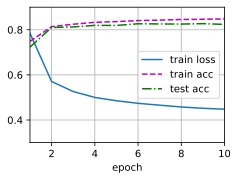

In [475]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

## 3.6.7 prediction

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


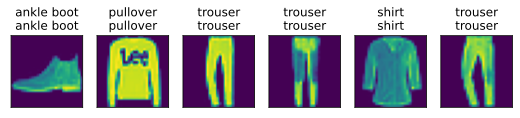

In [480]:
def predict_ch3(net, test_iter, n=6):  #@save
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)